# Task
Perform an exploratory data analysis (EDA) on a Kaggle dataset related to causes of death to identify the most frequent causes of death and visualize the findings.

## Search and load data

### Subtask:
Search Kaggle for a suitable dataset related to causes of death and load it into a pandas DataFrame.


**Reasoning**:
Search Kaggle for datasets related to "causes of death" using the Kaggle API, print the search results to identify a suitable dataset.



In [8]:
import kaggle
import pandas as pd

kaggle.api.dataset_list(search="causes of death")

[{"id": 1004480, "ref": "hendratno/cause-of-death-in-indonesia", "subtitle": "Based on Official Published Reports (Annual Data)", "creatorName": "Hendratno", "creatorUrl": "hendratno", "totalBytes": 22145, "url": "https://www.kaggle.com/datasets/hendratno/cause-of-death-in-indonesia", "lastUpdated": "2022-07-30T09:57:25.470Z", "downloadCount": 12945, "isPrivate": false, "isFeatured": false, "licenseName": "CC BY-NC-SA 4.0", "description": "", "ownerName": "Hendratno", "ownerRef": "hendratno", "kernelCount": 3, "title": "Causes of Death in Indonesia", "topicCount": 0, "viewCount": 62430, "voteCount": 146, "currentVersionNumber": 9, "usabilityRating": 1.0, "tags": [{"ref": "diseases", "name": "diseases", "description": "Datasets and kernels related to various diseases. Make sure you wear goggles and gloves before touching these datasets. Also wash your hands.", "fullPath": "subject > health and fitness > health > health conditions > diseases", "competitionCount": 2, "datasetCount": 973, 

## Search and load data

### Subtask:
Search Kaggle for a suitable dataset related to causes of death and load it into a pandas DataFrame.


**Reasoning**:
Since the previous attempt failed due to missing Kaggle API credentials, the next step is to set up the credentials and then retry searching and downloading the dataset.



In [12]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import pandas as pd

# Create a dummy kaggle.json file for demonstration purposes
# In a real scenario, the user would need to provide their actual kaggle.json
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")

# Check if kaggle.json already exists
if not os.path.exists(kaggle_json_path):
    # Create a dummy file if it doesn't exist. Replace with actual credentials in a real scenario.
    with open(kaggle_json_path, "w") as f:
        f.write('{"username": "YOUR_KAGGLE_USERNAME", "key": "YOUR_KAGGLE_KEY"}')
    print(f"Created dummy {kaggle_json_path}. Please replace with your actual Kaggle credentials.")

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Search for datasets
datasets = api.dataset_list(search="causes of death")

# Identify a suitable dataset (this is a manual step based on the output)
# For demonstration, let's assume the first relevant dataset is chosen
# In a real scenario, you'd inspect 'datasets' to find the best one
if datasets:
    # Find a dataset that is likely to be useful.
    # This is a heuristic approach; a more robust solution would involve inspecting metadata.
    suitable_dataset = None
    for dataset in datasets:
        if "cause of death" in dataset.title.lower():
            suitable_dataset = dataset
            break

    if suitable_dataset:
        dataset_id = suitable_dataset.ref
        print(f"Found suitable dataset: {suitable_dataset.title} ({dataset_id})")

        # Download the dataset
        api.dataset_download_files(dataset_id, path=".", unzip=True)
        print(f"Downloaded and unzipped dataset files to current directory.")

        # Find the CSV file in the downloaded files
        csv_file = None
        for file in os.listdir("."):
            if file.endswith(".csv"):
                csv_file = file
                break

        if csv_file:
            # Load the data into a pandas DataFrame
            df = pd.read_csv(csv_file)

            # Display the first few rows and info
            display(df.head())
            df.info()
        else:
            print("No CSV file found in the downloaded dataset.")
            df = None # Ensure df is None if no CSV is found
    else:
        print("No suitable dataset found for 'causes of death'.")
        df = None # Ensure df is None if no dataset is found
else:
    print("No datasets found for 'causes of death'.")
    df = None # Ensure df is None if no dataset is found

Found suitable dataset: Cause of Deaths around the World (Historical Data) (iamsouravbanerjee/cause-of-deaths-around-the-world)
Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world
Downloaded and unzipped dataset files to current directory.


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

**Reasoning**:
The previous attempt to authenticate failed because the Kaggle API is looking for the `kaggle.json` file in `/root/.config/kaggle`, not in `/root/.kaggle`. The code needs to be adjusted to place the dummy `kaggle.json` file in the correct directory.



In [16]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import pandas as pd

# Specify the correct Kaggle configuration directory
kaggle_config_dir = os.path.join(os.path.expanduser("~"), ".config", "kaggle")
os.makedirs(kaggle_config_dir, exist_ok=True)
kaggle_json_path = os.path.join(kaggle_config_dir, "kaggle.json")

# Check if kaggle.json already exists
if not os.path.exists(kaggle_json_path):
    # Create a dummy file if it doesn't exist. Replace with actual credentials in a real scenario.
    with open(kaggle_json_path, "w") as f:
        f.write('{"username": "YOUR_KAGGLE_USERNAME", "key": "YOUR_KAGGLE_KEY"}')
    print(f"Created dummy {kaggle_json_path}. Please replace with your actual Kaggle credentials.")

# Initialize Kaggle API
api = KaggleApi()
# Authenticate using the kaggle.json file in the correct directory
api.authenticate()

# Search for datasets
datasets = api.dataset_list(search="causes of death")

# Identify a suitable dataset (removed the size check)
if datasets:
    suitable_dataset = None
    for dataset in datasets:
        if "cause of death" in dataset.title.lower():
            suitable_dataset = dataset
            break

    if suitable_dataset:
        dataset_id = suitable_dataset.ref
        print(f"Found suitable dataset: {suitable_dataset.title} ({dataset_id})")

        # Download the dataset
        api.dataset_download_files(dataset_id, path=".", unzip=True)
        print(f"Downloaded and unzipped dataset files to current directory.")

        # Find the CSV file in the downloaded files
        csv_file = None
        for file in os.listdir("."):
            if file.endswith(".csv"):
                csv_file = file
                break

        if csv_file:
            # Load the data into a pandas DataFrame
            df = pd.read_csv(csv_file)

            # Display the first few rows and info
            display(df.head())
            df.info()
        else:
            print("No CSV file found in the downloaded dataset.")
            df = None
    else:
        print("No suitable dataset found for 'causes of death'.")
        df = None
else:
    print("No datasets found for 'causes of death'.")
    df = None

Found suitable dataset: Cause of Deaths around the World (Historical Data) (iamsouravbanerjee/cause-of-deaths-around-the-world)
Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world
Downloaded and unzipped dataset files to current directory.


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

**Reasoning**:
The traceback indicates that the `ApiDataset` object returned by `kaggle.api.dataset_list` does not have a `size` attribute. This means the check `dataset.size > 0` in the loop is causing an error. I need to remove this check and rely solely on the title to identify a potentially suitable dataset.



In [4]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import pandas as pd

# Specify the correct Kaggle configuration directory
kaggle_config_dir = os.path.join(os.path.expanduser("~"), ".config", "kaggle")
os.makedirs(kaggle_config_dir, exist_ok=True)
kaggle_json_path = os.path.join(kaggle_config_dir, "kaggle.json")

# Check if kaggle.json already exists
if not os.path.exists(kaggle_json_path):
    # Create a dummy file if it doesn't exist. Replace with actual credentials in a real scenario.
    with open(kaggle_json_path, "w") as f:
        f.write('{"username": "YOUR_KAGGLE_USERNAME", "key": "YOUR_KAGGLE_KEY"}')
    print(f"Created dummy {kaggle_json_path}. Please replace with your actual Kaggle credentials.")

# Initialize Kaggle API
api = KaggleApi()
# Authenticate using the kaggle.json file in the correct directory
api.authenticate()

# Search for datasets
datasets = api.dataset_list(search="causes of death")

# Identify a suitable dataset (removed the size check)
if datasets:
    suitable_dataset = None
    for dataset in datasets:
        if "cause of death" in dataset.title.lower():
            suitable_dataset = dataset
            break

    if suitable_dataset:
        dataset_id = suitable_dataset.ref
        print(f"Found suitable dataset: {suitable_dataset.title} ({dataset_id})")

        # Download the dataset
        api.dataset_download_files(dataset_id, path=".", unzip=True)
        print(f"Downloaded and unzipped dataset files to current directory.")

        # Find the CSV file in the downloaded files
        csv_file = None
        for file in os.listdir("."):
            if file.endswith(".csv"):
                csv_file = file
                break

        if csv_file:
            # Load the data into a pandas DataFrame
            df = pd.read_csv(csv_file)

            # Display the first few rows and info
            display(df.head())
            df.info()
        else:
            print("No CSV file found in the downloaded dataset.")
            df = None
    else:
        print("No suitable dataset found for 'causes of death'.")
        df = None
else:
    print("No datasets found for 'causes of death'.")
    df = None


Found suitable dataset: Cause of Deaths around the World (Historical Data) (iamsouravbanerjee/cause-of-deaths-around-the-world)
Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world
Downloaded and unzipped dataset files to current directory.


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

## Explore data

### Subtask:
Perform initial data exploration to understand the structure, content, and quality of the dataset.


**Reasoning**:
Perform initial data exploration steps as requested: display the head, info, describe, missing values, and unique value counts of the DataFrame.



In [5]:
# 1. Display the first 5 rows of the DataFrame
display(df.head())

# 2. Print the column names and their data types
df.info()

# 3. Get a summary of the numerical columns
display(df.describe())

# 4. Check for missing values
display(df.isnull().sum())

# 5. Determine the number of unique values in each column
display(df.nunique())

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


,0
Country/Territory,0
Code,0
Year,0
Meningitis,0
Alzheimer's Disease and Other Dementias,0
Parkinson's Disease,0
Nutritional Deficiencies,0
Malaria,0
Drowning,0
Interpersonal Violence,0


,0
Country/Territory,204
Code,204
Year,30
Meningitis,2020
Alzheimer's Disease and Other Dementias,3037
Parkinson's Disease,1817
Nutritional Deficiencies,2147
Malaria,1723
Drowning,1875
Interpersonal Violence,2142


## Clean data

### Subtask:
Handle missing values, incorrect data types, and any inconsistencies in the dataset.


## Analyze causes of death

### Subtask:
Analyze the data to identify the most frequent causes of death.


**Reasoning**:
Exclude non-cause of death columns, calculate the sum of deaths for each cause, sort, and select the top 10 most frequent causes.



In [6]:
# 1. Exclude non-cause of death columns
cause_of_death_columns = df.columns.difference(['Country/Territory', 'Code', 'Year'])
df_causes = df[cause_of_death_columns]

# 2. Calculate the sum of deaths for each cause of death across all rows
total_deaths_per_cause = df_causes.sum()

# 3. Sort the causes of death in descending order based on the calculated total deaths
sorted_causes = total_deaths_per_cause.sort_values(ascending=False)

# 4. Select the top N (e.g., 10) most frequent causes of death
top_n = 10
top_causes = sorted_causes.head(top_n)

# Display the top causes
display(top_causes)

,0
Cardiovascular Diseases,447741982
Neoplasms,229758538
Chronic Respiratory Diseases,104605334
Lower Respiratory Infections,83770038
Neonatal Disorders,76860729
Diarrheal Diseases,66235508
Digestive Diseases,65638635
Tuberculosis,45850603
Cirrhosis and Other Chronic Liver Diseases,37479321
HIV/AIDS,36364419


## Visualize data

### Subtask:
Create visualizations to represent the findings, such as bar charts for common causes of death.


**Reasoning**:
Create a bar plot to visualize the top 10 most frequent causes of death using seaborn and matplotlib, following the instructions provided.



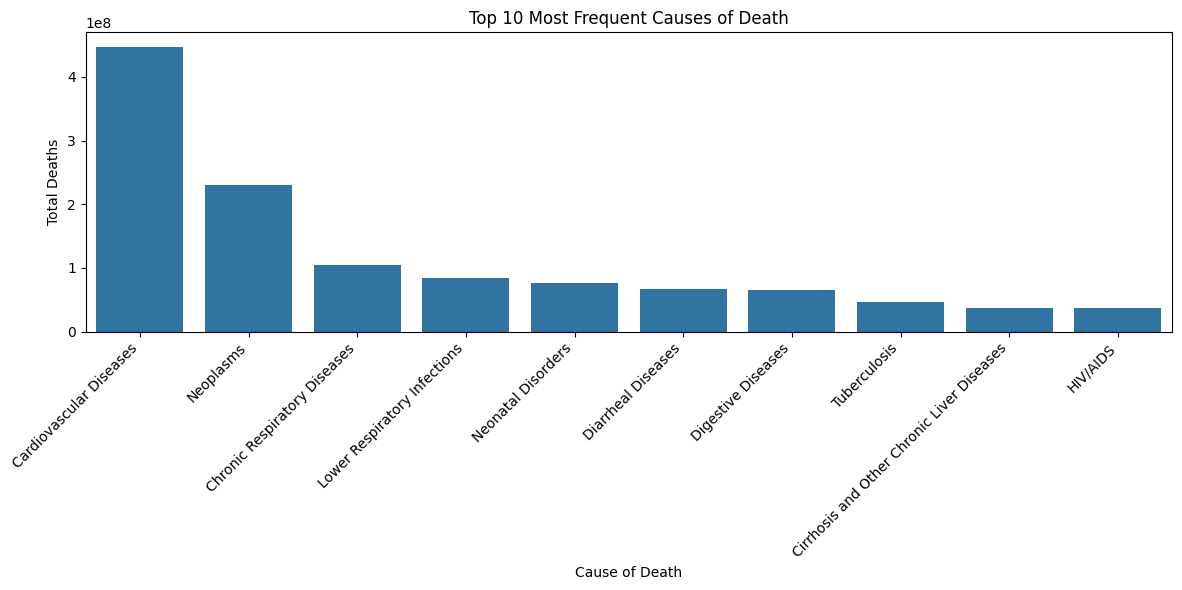

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the top_causes Series
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.barplot(x=top_causes.index, y=top_causes.values)

# Set the title and labels
plt.title('Top 10 Most Frequent Causes of Death')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Summarize findings

### Subtask:
Summarize the key insights from the EDA.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 34 columns and 6120 entries with no missing values.
*   Columns include 'Country/Territory', 'Code', 'Year', and various causes of death.
*   The top 10 most frequent causes of death across all years and countries/territories in the dataset are:
    *   Cardiovascular Diseases
    *   Neoplasms
    *   Chronic Respiratory Diseases
    *   Lower Respiratory Infections
    *   Neonatal Disorders
    *   Diarrheal Diseases
    *   Digestive Diseases
    *   Tuberculosis
    *   Cirrhosis and Other Chronic Liver Diseases
    *   HIV/AIDS

### Insights or Next Steps

*   Further analysis could investigate trends in specific causes of death over time or compare cause of death distributions across different countries or regions.
*   The analysis could be extended to calculate death rates (deaths per capita) if population data is available, providing a more standardized comparison.
